## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [41]:
# Importing the relevant modules

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder 
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_goldfeldquandt

# import Functions as fun

In [42]:
# Loading the dataset

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [43]:
# Viewing information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Cleaning

### Missing data

In [44]:
# This  function checks for missing values and removes them and shows a dataframe for their percentages

def missing_data(data):
    
    
#     finding sum of all the missing data in the df.
    miss = data.isnull().sum().sort_values(ascending=False)
    
#     Converting it into percentage. 
    miss_percentage = miss / len(data)
    
#     Creating a dataframe to show the missing data. 
    df_missing = pd.DataFrame({'Missing values number': miss, 'Percentage missing values': miss_percentage})
    
#     drop missing values
    df_missing.drop(df_missing[df_missing['Percentage missing values'] == 0].index, inplace=True)
    
    return df_missing

missing = missing_data(df)
missing

,Missing values number,Percentage missing values
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917


In [45]:
# Dropping all the null values.

df = df.dropna(axis=0)

In [46]:
# Checking the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long       

Dropping null values makes us loose a quater of our data as seen from above. Replacing the null data with the mode of our data would not skew or interapt our data majorly. 

In [47]:
# Function to  replace our null data.

def fill_missing(data, columns):
    missing_ = missing_data(data)
    for col in columns:
#         Check if there is missing data
        if col in missing_.index:
#         Replacing the missing data with the mode
            data[col] = data[col].fillna(data[col].mode()[0])
            
    return data

fill_missing(df, ['yr_renovated', 'waterfront', 'view'])


df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
# Function to check for duplicates.

def duplicates(data):
    
    duplicates = data.duplicated().sum()
    
    return duplicates

df_dup = duplicates(df)
df_dup

0

### Outliers

In [49]:
copy_df = df.copy()
copy_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [50]:
copy_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
# Selecting only columns with the integer dtypes.

cols = copy_df.select_dtypes(include='int').columns
cols

Index(['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
# Function to check for outliers in the columns.

def outlier_box_plot(data, column_name):
    
    sns.boxplot(x=data[column_name])


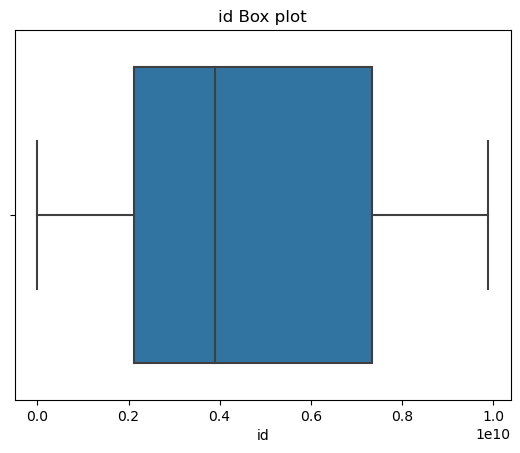

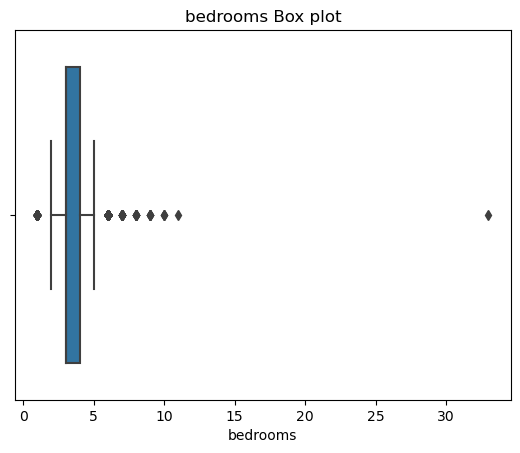

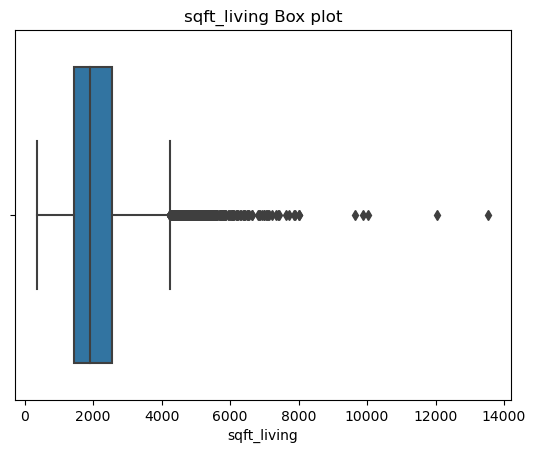

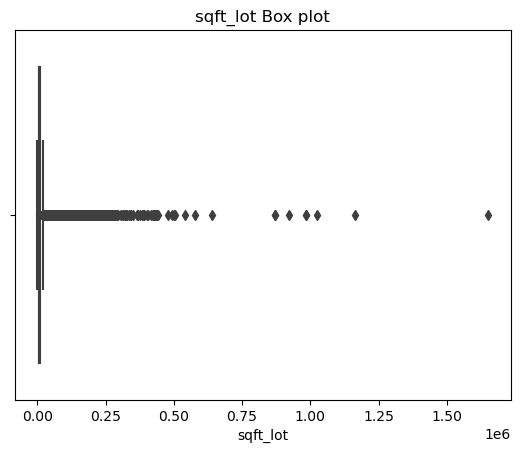

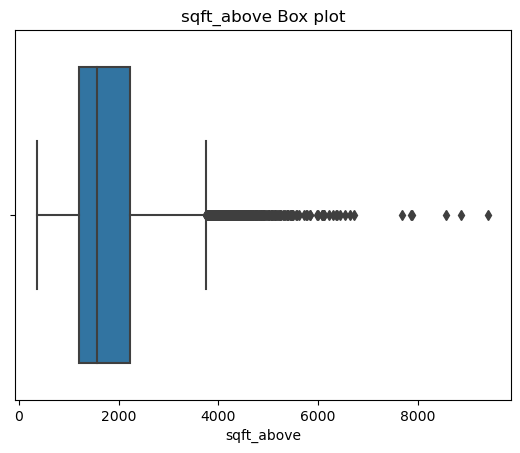

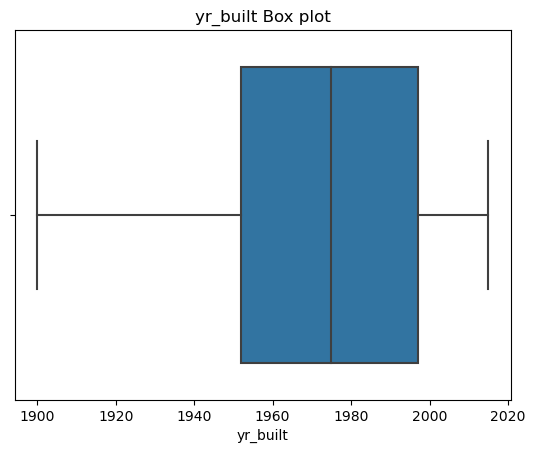

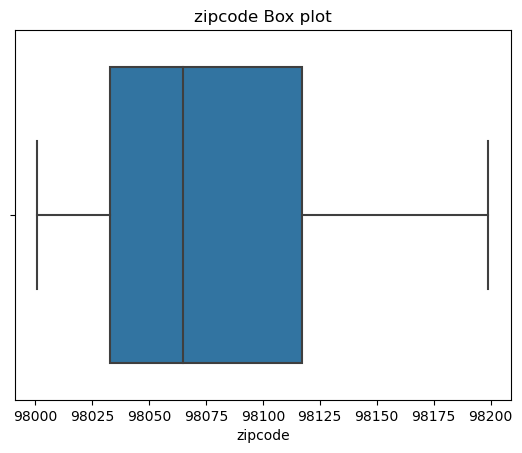

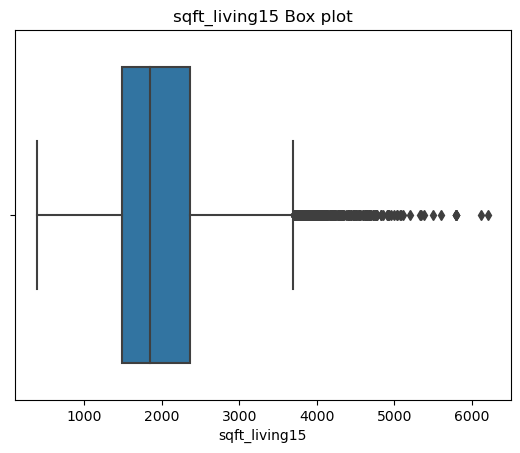

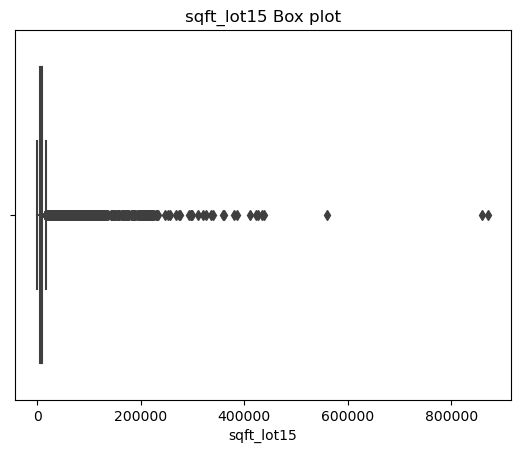

In [53]:
# Checking for outliers in the columns and plotting the box plot.

for column in copy_df.select_dtypes(include='int').columns:
    
    outlier_box_plot(copy_df, column)
    plt.title(f'{column} Box plot')
    plt.show()

In [54]:
# Function to remove the outliers.

def remove_outliers(data, columns, threshold=3):
    
    
    for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data = data[z_scores <= threshold]
        
    return data

Since `id`, `zipcode` and `yr_built` are numeric categotical columns, we do not need to find outliers from them. Hence, we need to remove them from our selection of removing outliers.

In [55]:
# Removing outliers.

select_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

without_outliers_df = remove_outliers(copy_df, select_columns)

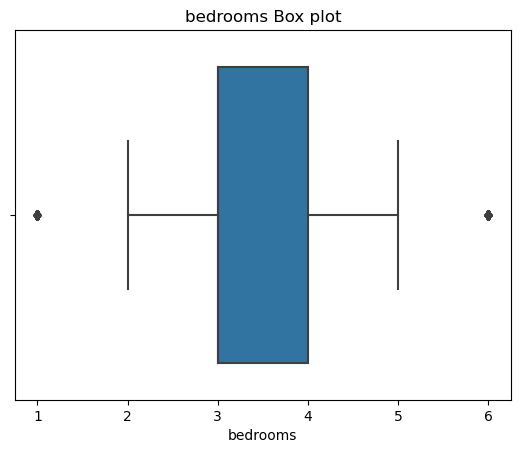

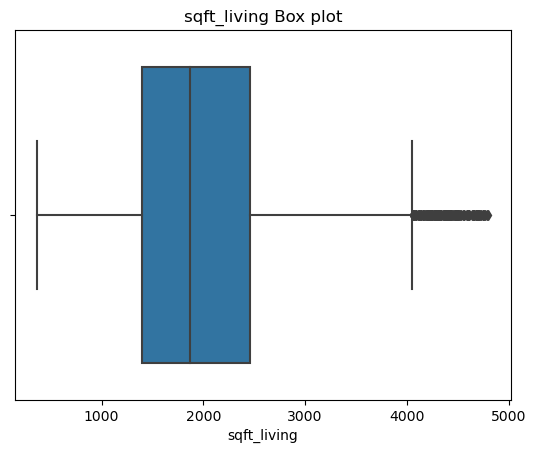

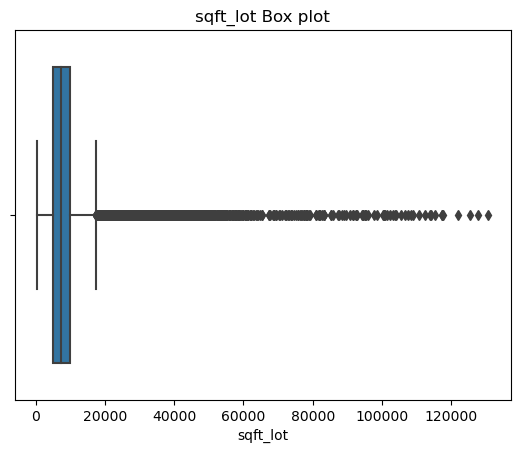

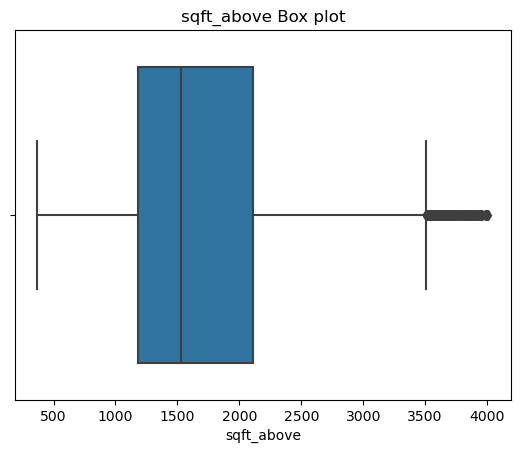

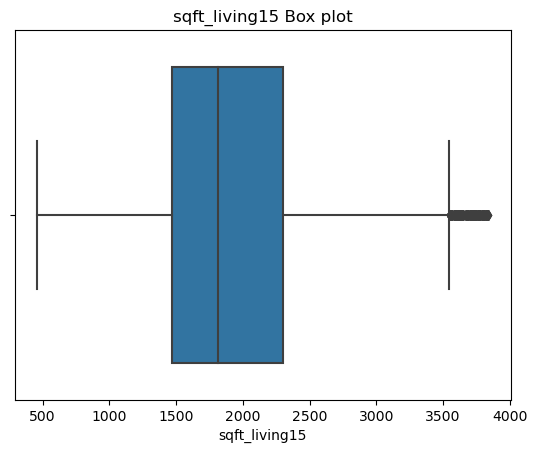

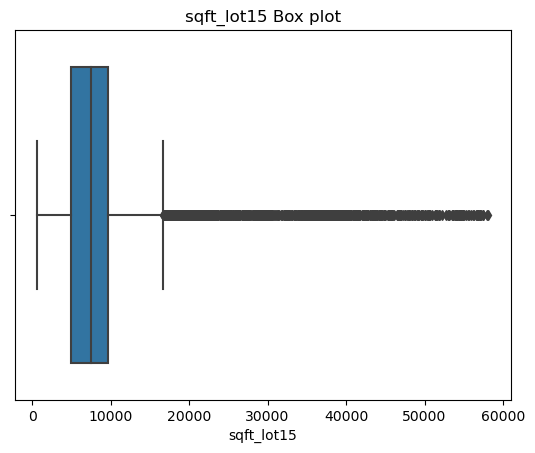

In [56]:
# Checking for outliers in the columns and plotting the box plot.

for col in select_columns:
    
    outlier_box_plot(without_outliers_df, col)
    plt.title(f'{col} Box plot')
    plt.show()

## Data preparation

### Adding `seasons` to the dataset using the `date` column

In [57]:
# Coverting the column date to a date time object.

copy_df['date'] = pd.to_datetime(copy_df['date'])

# Creating a dictionary to represent each individual season
seasons = {1 : 'Winter',
          2 : 'Winter',
          3 : 'Spring',
          4 : 'Spring',
          5 : 'Spring',
          6 : 'Summer',
          7 : 'Summer',
          8 : 'Summer',
          9 : 'Autumn',
          10 : 'Autumn',
          11 : 'Autumn',
          12 : 'Winter'}
copy_df['season'] = copy_df['date'].dt.month.map(seasons)

copy_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Winter


### Adding `age` to the dataset using `date` and `yr_built`

In [58]:
copy_df['age'] = copy_df['date'].dt.year - copy_df['yr_built']
copy_df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season,age
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter,63
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Winter,28
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,Spring,13


### Categorical columns

In [59]:
copy_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'season', 'age'],
      dtype='object')

First we'll need to drop the columns we are not going to use. The remaining columns are mainly going to be used as our predictor variables for the price variables. 

Columns we'll drop are `id`, `date`, `yr_built`,  `zipcode`, `lat`, `long`. Also `sqft_living15`, `sqft_lot15` as they are not relevant in our dataset. 

In [60]:
new_df = copy_df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'season', 'age']]

In [61]:
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,season,age
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1991.0,Winter,63
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,0.0,Winter,49
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,0.0,Winter,28
5,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,0.0,Spring,13
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,0.0,Summer,19


#### Ordinal categorical variables

In [62]:
new_df['view'].value_counts()

view
NONE         14241
AVERAGE        688
GOOD           348
FAIR           245
EXCELLENT      240
Name: count, dtype: int64

In [63]:
new_df['grade'].value_counts()

grade
7 Average        6539
8 Good           4438
9 Better         1920
6 Low Average    1482
10 Very Good      832
11 Excellent      290
5 Fair            167
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: count, dtype: int64

In [64]:
new_df['condition'].value_counts()

condition
Average      10221
Good          4137
Very Good     1254
Fair           131
Poor            19
Name: count, dtype: int64

#### Nominal categorical variables

In [65]:
new_df['waterfront'].value_counts()

waterfront
NO     15642
YES      120
Name: count, dtype: int64

In [66]:
new_df['season'].value_counts()

season
Spring    4762
Summer    4631
Autumn    3688
Winter    2681
Name: count, dtype: int64

## Collinearity

Building a correlation matrix, but first we will drop the all the categorical columns.

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15762 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   waterfront     15762 non-null  object 
 7   view           15762 non-null  object 
 8   condition      15762 non-null  object 
 9   grade          15762 non-null  object 
 10  sqft_above     15762 non-null  int64  
 11  sqft_basement  15762 non-null  object 
 12  yr_renovated   15762 non-null  float64
 13  season         15762 non-null  object 
 14  age            15762 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.9+ MB


In [91]:
# cols = copy_df.select_dtypes(include='int').columns

# new_df.select_dtypes(include='float').columns


# Columns that have only integers and floats. 
corr_df = new_df[['price', 'bathrooms', 'floors', 'yr_renovated', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'age' ]]

corr_df.head()

,price,bathrooms,floors,yr_renovated,bedrooms,sqft_living,sqft_lot,sqft_above,age
1,538000.0,2.25,2.0,1991.0,3,2570,7242,2170,63
3,604000.0,3.00,1.0,0.0,4,1960,5000,1050,49
4,510000.0,2.00,1.0,0.0,3,1680,8080,1680,28
5,1230000.0,4.50,1.0,0.0,4,5420,101930,3890,13
6,257500.0,2.25,2.0,0.0,3,1715,6819,1715,19


In [93]:
# Correlation matrix

corr_df.corr()

,price,bathrooms,floors,yr_renovated,bedrooms,sqft_living,sqft_lot,sqft_above,age
price,1.000000,0.526155,0.259505,0.122731,0.305489,0.706189,0.084504,0.612014,-0.049281
bathrooms,0.526155,1.000000,0.505187,0.046988,0.512243,0.753846,0.080362,0.685677,-0.505200
floors,0.259505,0.505187,1.000000,-0.000720,0.180485,0.359407,-0.009924,0.529101,-0.487347
yr_renovated,0.122731,0.046988,-0.000720,1.000000,0.017430,0.050232,0.002147,0.018888,0.223176
bedrooms,0.305489,0.512243,0.180485,0.017430,1.000000,0.573575,0.025460,0.474272,-0.153275
sqft_living,0.706189,0.753846,0.359407,0.050232,0.573575,1.000000,0.165336,0.876176,-0.314617
sqft_lot,0.084504,0.080362,-0.009924,0.002147,0.025460,0.165336,1.000000,0.174216,-0.051477
sqft_above,0.612014,0.685677,0.529101,0.018888,0.474272,0.876176,0.174216,1.000000,-0.419172
age,-0.049281,-0.505200,-0.487347,0.223176,-0.153275,-0.314617,-0.051477,-0.419172,1.000000


Checking if any absolute correlation value is greater than 0.75

In [94]:
abs(corr_df.corr()) > 0.75

,price,bathrooms,floors,yr_renovated,bedrooms,sqft_living,sqft_lot,sqft_above,age
price,True,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,True,False,False,False
floors,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,True,False,False,False,False,False
bedrooms,False,False,False,False,True,False,False,False,False
sqft_living,False,True,False,False,False,True,False,True,False
sqft_lot,False,False,False,False,False,False,True,False,False
sqft_above,False,False,False,False,False,True,False,True,False
age,False,False,False,False,False,False,False,False,True


It seems like the variables `sqft_living`, `bathrooms` and `sqft_above` are all pretty highly correlated among each other. 

Now, including `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [96]:
 # Finding the absolute correlation values and arranging them in descending order

df = corr_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# creating pairs for the correlation pairs

df['pairs'] = list(zip(df.level_0, df.level_1))

# Setting the pairs column as the index column.

df.set_index(['pairs'], inplace=True)

# dropping the level columns

df.drop(columns=['level_0', 'level_1'], inplace=True)

# Renaming the correlation column as cc rather than 0

df.columns = ['cc']

# dropping the duplicates

df.drop_duplicates(inplace=True)

In [97]:
df[(df.cc>0.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876176
"(bathrooms, sqft_living)",0.753846


In [100]:
corr_df.corr()['price'].sort_values(ascending=False)

price           1.000000
sqft_living     0.706189
sqft_above      0.612014
bathrooms       0.526155
bedrooms        0.305489
floors          0.259505
yr_renovated    0.122731
sqft_lot        0.084504
age            -0.049281
Name: price, dtype: float64

Removing the `sqft_above` column is the most sensible option as it's the total area of the whole floor excluding the basement.

In [101]:
new_df.drop(columns=['sqft_above'], inplace=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,season,age
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1991.0,Winter,63
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,910.0,0.0,Winter,49
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,0.0,0.0,Winter,28
5,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,1530.0,0.0,Spring,13
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,?,0.0,Summer,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,130.0,0.0,Winter,7
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,0.0,0.0,Spring,5
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,0.0,0.0,Winter,1
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,0.0,0.0,Summer,5


## Modelling